In [47]:
#Importando bibliotecas para o projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from unidecode import unidecode

sns.set_theme(context="notebook", style="whitegrid")

In [48]:
#Importando dados para análise
raw_data = pd.read_csv("Dados dos Alunos - Ciência dos Dados - Página1.csv")

usable_data = pd.DataFrame({"peso": raw_data["Peso (Kg)"],
                          "deslocamento": raw_data["Modo de deslocamento"]})

print(usable_data.head(5))

   peso deslocamento
0    79       Ônibus
1    85        Carro
2    72       Ônibus
3    95        Carro
4    55        Carro


# Análise do peso da turma

In [49]:
#Criando dataframe de distribuição de frequência
records_number = len(usable_data["peso"])
upper_limit = max(usable_data["peso"])
lower_limit = min(usable_data["peso"])

print(f"Número de registros: {records_number}")
print(f"Limite superior: {upper_limit}")
print(f"Limite inferior: {lower_limit}")

total_amplitude = upper_limit - lower_limit
class_amplitude = np.ceil(total_amplitude / np.sqrt(records_number))

print(f"Amplitude total: {total_amplitude}")
print(f"Amplitude de classe: {class_amplitude}")

Número de registros: 39
Limite superior: 110
Limite inferior: 46
Amplitude total: 64
Amplitude de classe: 11.0


In [50]:
#Criando classes para distribuição de frequência
classes = []

class_marker = lower_limit

while class_marker <= upper_limit:
    classes.append([class_marker, (class_marker + class_amplitude)])
    class_marker += class_amplitude

print(classes)

[[46, 57.0], [57.0, 68.0], [68.0, 79.0], [79.0, 90.0], [90.0, 101.0], [101.0, 112.0]]


In [51]:
#Calculando frequência absoluta
absolute_frequency = []


for cl in classes:    
    correct_values_queue = usable_data[(usable_data["peso"] >= cl[0]) & (usable_data["peso"] < cl[1])]
    absolute_frequency.append(len(correct_values_queue))
    
print(f"Frequência absoluta: {absolute_frequency}")

#calculando ponto médio
midpoints =  [*map(lambda n: (sum(n) / 2), classes)]

print(f"Ponto médio: {midpoints}")

#Calculando frequência acumulada
accumulated_frequency = []

for c in range(len(classes)):
    accumulated_frequency.append(sum(absolute_frequency[:c+1]))
    
print(f"Frequência acumulada: {accumulated_frequency}")

#Frequencia acumulada percentual
accumulated_frequency_percentage = [*map(lambda n: ((n / records_number) * 100), accumulated_frequency)]

print(f"Frequência acumulada percentual: {accumulated_frequency_percentage}")

#Frequencia Relativa
relative_frequency = [*map(lambda n: (n / records_number), absolute_frequency)]

print(f"Frequência relativa: {relative_frequency}")

#Frequencia Relativa Percentual
relative_frequency_percentage = [*map(lambda n: (n * 100), relative_frequency)]

print(f"Frequência relativa percentual: {relative_frequency_percentage}")



Frequência absoluta: [3, 8, 15, 5, 7, 1]
Ponto médio: [51.5, 62.5, 73.5, 84.5, 95.5, 106.5]
Frequência acumulada: [3, 11, 26, 31, 38, 39]
Frequência acumulada percentual: [7.6923076923076925, 28.205128205128204, 66.66666666666666, 79.48717948717949, 97.43589743589743, 100.0]
Frequência relativa: [0.07692307692307693, 0.20512820512820512, 0.38461538461538464, 0.1282051282051282, 0.1794871794871795, 0.02564102564102564]
Frequência relativa percentual: [7.6923076923076925, 20.51282051282051, 38.46153846153847, 12.82051282051282, 17.94871794871795, 2.564102564102564]


In [52]:

#Dataframe da tabela de distribuicao de frequencias para cálculos
frequency_distribution_table = pd.DataFrame({
    "Classes": classes,
    "fi": absolute_frequency,
    "xi": midpoints,
    "fa": accumulated_frequency,
    "fa%": accumulated_frequency_percentage,
    "fr": relative_frequency,
    "fr%": relative_frequency_percentage  
})

display(Markdown(frequency_distribution_table.to_markdown(index=False)))


| Classes        |   fi |    xi |   fa |       fa% |        fr |      fr% |
|:---------------|-----:|------:|-----:|----------:|----------:|---------:|
| [46, 57.0]     |    3 |  51.5 |    3 |   7.69231 | 0.0769231 |  7.69231 |
| [57.0, 68.0]   |    8 |  62.5 |   11 |  28.2051  | 0.205128  | 20.5128  |
| [68.0, 79.0]   |   15 |  73.5 |   26 |  66.6667  | 0.384615  | 38.4615  |
| [79.0, 90.0]   |    5 |  84.5 |   31 |  79.4872  | 0.128205  | 12.8205  |
| [90.0, 101.0]  |    7 |  95.5 |   38 |  97.4359  | 0.179487  | 17.9487  |
| [101.0, 112.0] |    1 | 106.5 |   39 | 100       | 0.025641  |  2.5641  |

[Text(0.5, 0, 'Peso'),
 Text(0, 0.5, 'Frequência'),
 Text(0.5, 1.0, 'Distribuição de frequencia do peso da turma')]

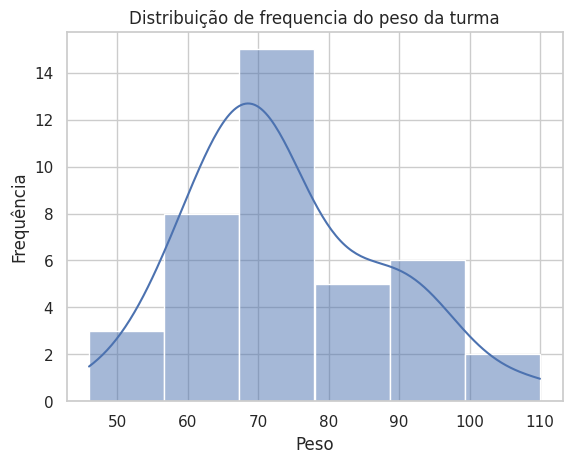

In [53]:
#Plotando distribuição de frequencia
frequency_histogram = sns.histplot(data=usable_data, x="peso", kde=True, binwidth=class_amplitude)
frequency_histogram.set(xlabel="Peso", ylabel="Frequência",title="Distribuição de frequencia do peso da turma", )

[Text(0.5, 0, 'Peso'),
 Text(0, 0.5, 'Frequência'),
 Text(0.5, 1.0, 'Distribuição de frequencia do peso da turma')]

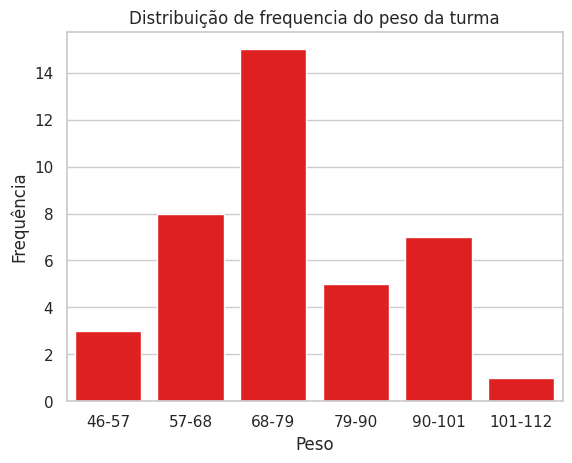

In [54]:
#Plotando como gráfico de barras
barchart_df = pd.DataFrame({
    "classes": [*map(lambda x: f"{int(x[0])}-{int(x[1])}", frequency_distribution_table["Classes"])],
    "fi": frequency_distribution_table["fi"]
})
barchart = sns.barplot(data=barchart_df, x="classes", y="fi", color="red")
barchart.set(xlabel="Peso", ylabel="Frequência", title="Distribuição de frequencia do peso da turma")

In [55]:
#Calculando Variância Populacional, Desvio Padrão e Coeficient de Variação
sum_to_mean = frequency_distribution_table["fi"] * frequency_distribution_table["xi"]
mean_value = sum(sum_to_mean) / records_number

print(f"Média: {mean_value}")

sum_to_variance = frequency_distribution_table["fi"] * (frequency_distribution_table["xi"].pow(2)) # SUM[fi*xi^2]
variance = (sum(sum_to_variance) / records_number) - (mean_value ** 2)

print(f"Variância: {variance}")

standart_deviation = np.sqrt(variance)

print(f"Desvio padrão: {standart_deviation}")

deviation_coefficient = (standart_deviation / mean_value) * 100

print(f"Coeficiente de variação: {deviation_coefficient}")

Média: 75.75641025641026
Variância: 187.26758711373986
Desvio padrão: 13.684574787465625
Coeficiente de variação: 18.063916625864252


In [56]:
#Calculando a mediana pela tabela de distribuição de frequência

#calcular posição da mediana
median_pos = (records_number / 2) if records_number % 2 == 0 else ((records_number + 1) / 2) 

#Encontrar o número da classe que contém a posição da mediana
median_class_index = frequency_distribution_table[frequency_distribution_table["fa"] >= median_pos].index[0]

previous_fa = frequency_distribution_table["fa"][median_class_index - 1]

median_lower_limit = frequency_distribution_table['Classes'][median_class_index][0]

#Aplicando a fórmula da mediana
median = (median_pos - previous_fa) * class_amplitude
median /= frequency_distribution_table["fi"][median_class_index]
median += median_lower_limit
print(f"Mediana: {median}")

#Encontrando a moda pela tabela de distribuição de frequência
modal_class_index = frequency_distribution_table.sort_values(by="fi", ascending=False).head(1).index[0]

modal_lower_limit = frequency_distribution_table["Classes"][modal_class_index][0]

d1 = frequency_distribution_table["fi"][modal_class_index] - frequency_distribution_table["fi"][modal_class_index - 1] 
d2 = frequency_distribution_table["fi"][modal_class_index] - frequency_distribution_table["fi"][modal_class_index + 1] 

#Utilizando a fórmula para encontrar a moda
mode = (d1 / (d1 + d2)) * class_amplitude
mode += modal_lower_limit

print(f"Moda: {frequency_distribution_table['Classes'][modal_class_index]} - {mode}")

Mediana: 74.6
Moda: [68.0, 79.0] - 72.52941176470588


# Análise dos métodos de deslocamento da turma

In [63]:
#Dado obtidos até o momento
transport_methods = usable_data["deslocamento"]

print(f"Dados brutos:\n{transport_methods[:5]}\n")

#Normalizando os dados
normalized_transport_methods = transport_methods.map(lambda n: unidecode(n.strip().lower()))
normalized_transport_methods = normalized_transport_methods.sort_values()

print(f"Dados normalizados:\n{normalized_transport_methods[:5]}")

Dados brutos:
0    Ônibus
1     Carro
2    Ônibus
3     Carro
4     Carro
Name: deslocamento, dtype: object

Dados normalizados:
19    carro
34    carro
33    carro
31    carro
29    carro
Name: deslocamento, dtype: object


[Text(0.5, 0, 'Método de transporte'),
 Text(0, 0.5, 'Ocorrências'),
 Text(0.5, 1.0, 'Metódos de transporte usados pela turma')]

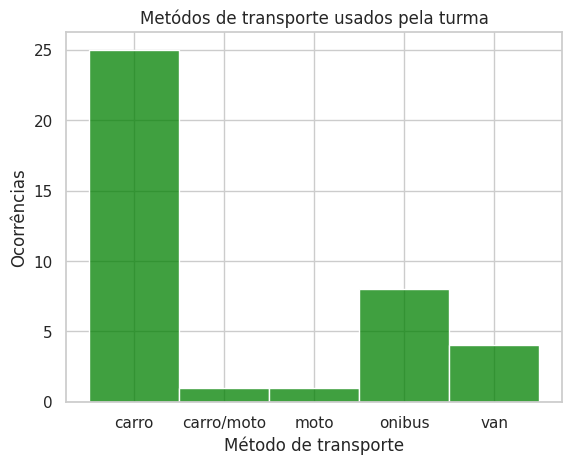

In [64]:
#Plotando dados
rdp = sns.histplot(data=normalized_transport_methods, color="green")
rdp.set(xlabel="Método de transporte", ylabel="Ocorrências", title="Metódos de transporte usados pela turma")

[Text(0.5, 0, 'Método de transporte'),
 Text(0, 0.5, 'Porcentagem'),
 Text(0.5, 1.0, 'Proporção de metódos de transporte usados pela turma')]

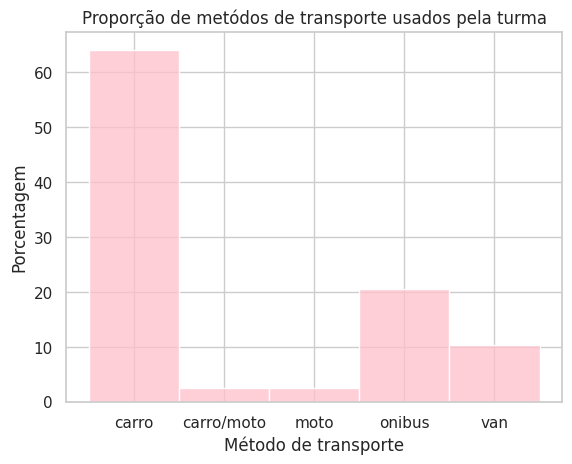

In [69]:
#Plotando relação de porcentagem
rdpp = sns.histplot(data=normalized_transport_methods, stat="percent", color="pink")
rdpp.set(xlabel="Método de transporte", ylabel="Porcentagem", title="Proporção de metódos de transporte usados pela turma")